In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../dataset/billionaires.csv')
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [5]:
final_worth = df['finalWorth']
mean_final_worth = final_worth.mean()
median_final_worth = final_worth.median()
skew_final_worth = final_worth.skew()
kurtosis_final_worth = final_worth.kurt()

In [6]:
print("Final Worth Statistics:")
print(f"Mean: {mean_final_worth}")
print(f"Median: {median_final_worth}")
print(f"Skewness: {skew_final_worth}")
print(f"Kurtosis: {kurtosis_final_worth}")

Final Worth Statistics:
Mean: 4623.787878787879
Median: 2300.0
Skewness: 10.012367321086751
Kurtosis: 145.07368067526582


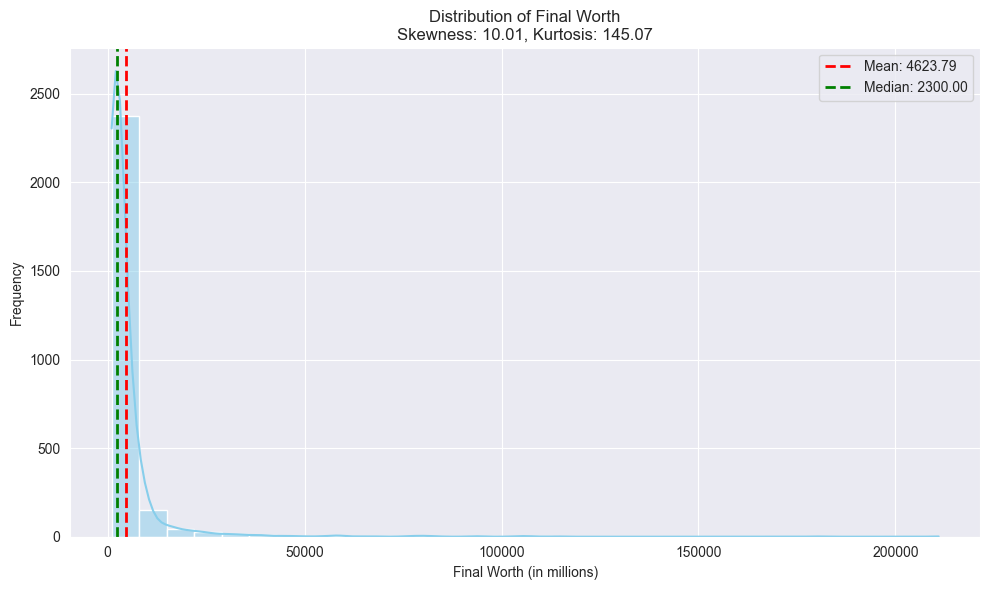

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(final_worth, bins=30, kde=True, color='skyblue')
plt.axvline(mean_final_worth, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_final_worth:.2f}')
plt.axvline(median_final_worth, color='green', linestyle='--', linewidth=2, label=f'Median: {median_final_worth:.2f}')
plt.title('Distribution of Final Worth\nSkewness: {:.2f}, Kurtosis: {:.2f}'.format(skew_final_worth, kurtosis_final_worth))
plt.xlabel('Final Worth (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

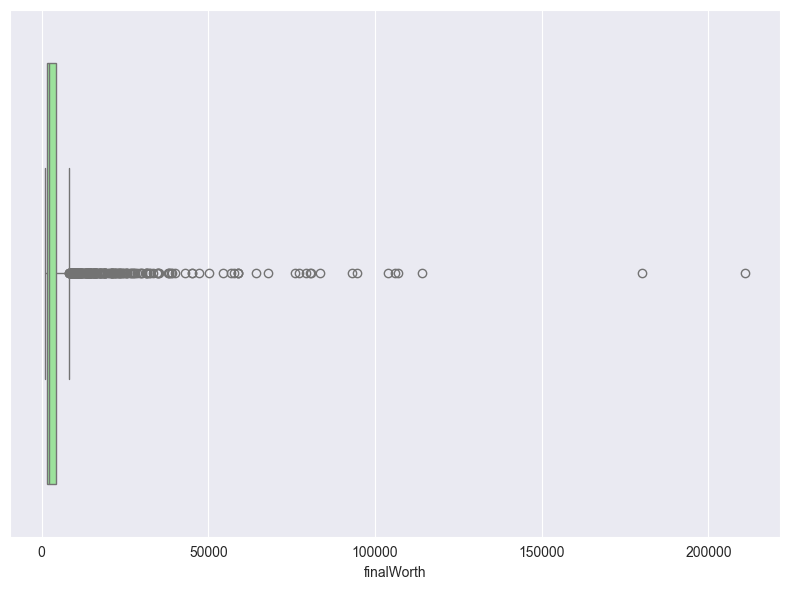

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x=final_worth, color='lightgreen')
plt.tight_layout()
plt.show()

### Remove outliers using IQR method

In [12]:
Q1 = final_worth.quantile(0.25)
Q3 = final_worth.quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - (3 * IQR)
upper_fence = Q3 + (3 * IQR)
df['is_extreme_outlier'] = (final_worth > upper_fence) | (final_worth < lower_fence)
num_extreme_outliers = df['is_extreme_outlier'].sum()
print(f"Number of extreme outliers detected: {num_extreme_outliers}")

Number of extreme outliers detected: 140


In [13]:
final_worth = df.loc[~df['is_extreme_outlier'], 'finalWorth']
mean_final_worth = final_worth.mean()
median_final_worth = final_worth.median()
skew_final_worth = final_worth.skew()
kurtosis_final_worth = final_worth.kurt()

In [14]:
print("Final Worth Statistics after removing extreme outliers:")
print(f"Mean: {mean_final_worth}")
print(f"Median: {median_final_worth}")
print(f"Skewness: {skew_final_worth}")
print(f"Kurtosis: {kurtosis_final_worth}")

Final Worth Statistics after removing extreme outliers:
Mean: 3035.68
Median: 2200.0
Skewness: 1.6646313461296731
Kurtosis: 2.4284061542640627


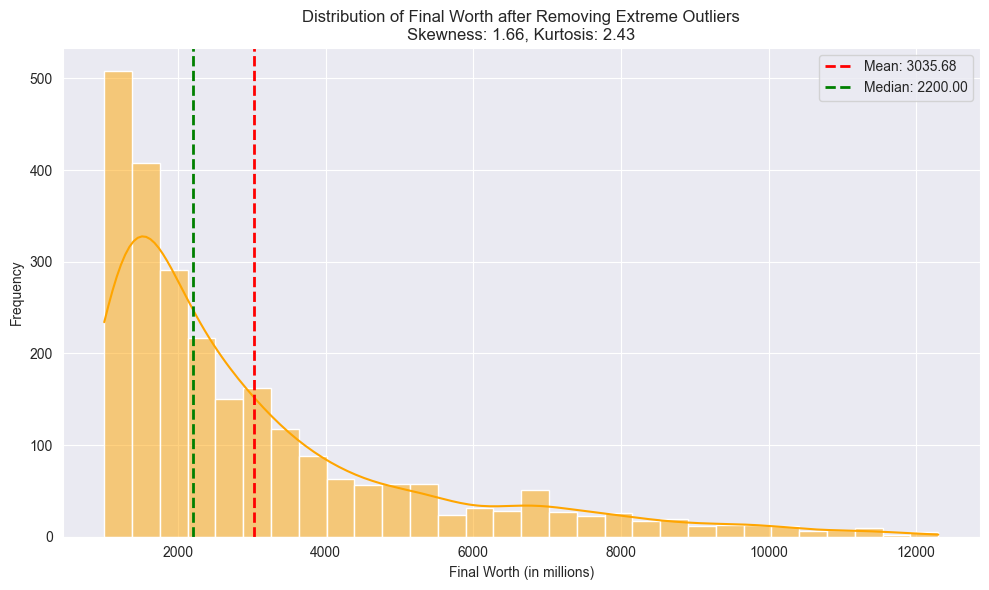

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(final_worth, bins=30, kde=True, color='orange')
plt.axvline(mean_final_worth, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_final_worth:.2f}')
plt.axvline(median_final_worth, color='green', linestyle='--', linewidth=2, label=f'Median: {median_final_worth:.2f}')
plt.title('Distribution of Final Worth after Removing Extreme Outliers\nSkewness: {:.2f}, Kurtosis: {:.2f}'.format(skew_final_worth, kurtosis_final_worth))
plt.xlabel('Final Worth (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

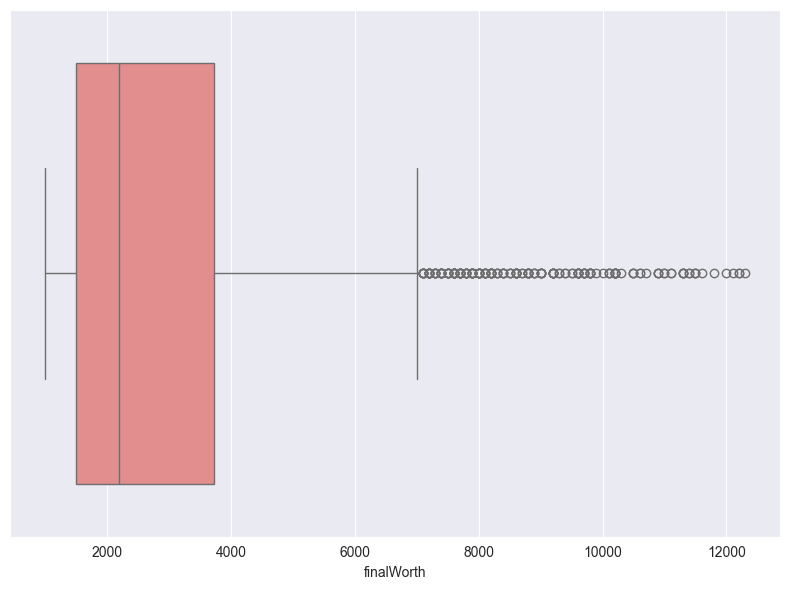

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x=final_worth, color='lightcoral')
plt.tight_layout()
plt.show()

In [17]:
print("Original final worth count:", df.shape[0])
print("Final worth count after removing extreme outliers:", final_worth.shape[0])

Original final worth count: 2640
Final worth count after removing extreme outliers: 2500


### Compare CoV for two categories: Technology vs Fashion

In [18]:
group1_name = 'Fashion & Retail'
group2_name = 'Technology'

In [19]:
group1 = df[df['category'] == group1_name]['finalWorth']
group2 = df[df['category'] == group2_name]['finalWorth']

In [20]:
# Calculate Coefficient of Variation (CoV)
cov_group1 = group1.std() / group1.mean() * 100
cov_group2 = group2.std() / group2.mean() * 100

In [21]:
print("Coefficient of Variation (CoV):")
print(f"{group1_name} CoV: {cov_group1:.2f}%")
print(f"{group2_name} CoV: {cov_group2:.2f}%")

Coefficient of Variation (CoV):
Fashion & Retail CoV: 256.54%
Technology CoV: 234.77%
